In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
cars = pd.read_csv("car_data.csv")
cars.sample(10)

,mpg,cyl,displacement,hp,weight,acceleration,year,origin,name
201,22.5,6,232.0,90.0,3085,17.6,76,1,amc hornet
18,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet monte carlo
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
233,20.5,6,231.0,105.0,3425,16.9,77,1,buick skylark
93,14.0,8,304.0,150.0,3672,11.5,73,1,amc matador
28,25.0,4,104.0,95.0,2375,17.5,70,2,saab 99e
349,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
52,18.0,6,258.0,110.0,2962,13.5,71,1,amc hornet sportabout (sw)
197,14.5,8,351.0,152.0,4215,12.8,76,1,ford gran torino
273,30.0,4,98.0,68.0,2155,16.5,78,1,chevrolet chevette


In [3]:
cars.shape

(406, 9)

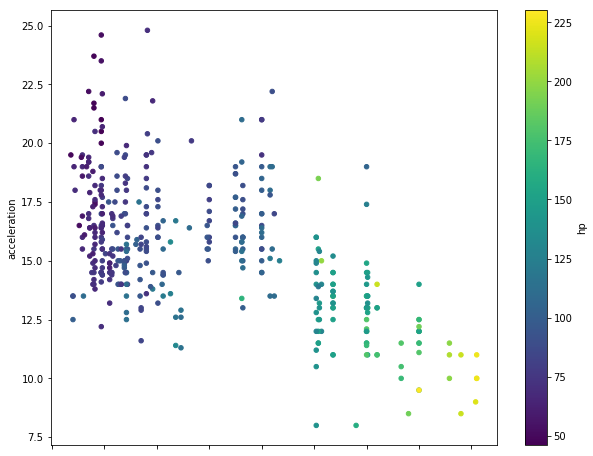

In [4]:
cars.plot.scatter(x='displacement', y='acceleration', c='hp', colormap='viridis', figsize=(10,8));

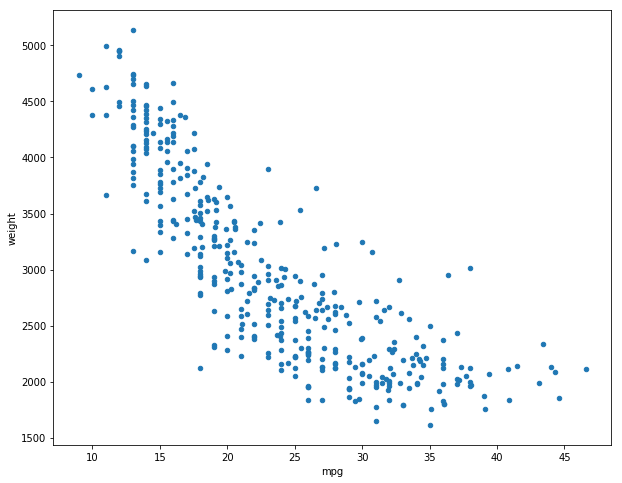

In [5]:
cars.plot.scatter(x='mpg', y='weight', figsize=(10,8));

In [6]:
cars.isnull().sum()

mpg             8
cyl             0
displacement    0
hp              6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [7]:
cars['mpg'] = cars['mpg'].fillna(cars['mpg'].mean())

In [8]:
cars.isnull().sum()

mpg             0
cyl             0
displacement    0
hp              6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [9]:
cars['hp'].max()

230.0

In [10]:
cars['year'].head(10)

0    70
1    70
2    70
3    70
4    70
5    70
6    70
7    70
8    70
9    70
Name: year, dtype: int64

In [11]:
cars.shape

(406, 9)

In [29]:
cars['hp'].mean()

105.0825

In [32]:
cars['hp'].fillna(0, inplace=True)

In [73]:
hpna = np.where(cars['hp'] == 0)
hpna

(array([ 38, 133, 337, 343, 361, 382]),)

In [38]:
cars.iloc[hpna]

,mpg,cyl,displacement,hp,weight,acceleration,year,origin,name,ifhp
38,25.0,4,98.0,0.0,2046,19.0,71,1,ford pinto,True
133,21.0,6,200.0,0.0,2875,17.0,74,1,ford maverick,True
337,40.9,4,85.0,0.0,1835,17.3,80,2,renault lecar deluxe,True
343,23.6,4,140.0,0.0,2905,14.3,80,1,ford mustang cobra,True
361,34.5,4,100.0,0.0,2320,15.8,81,2,renault 18i,True
382,23.0,4,151.0,0.0,3035,20.5,82,1,amc concord dl,True


In [39]:
cars.dtypes

mpg             float64
cyl               int64
displacement    float64
hp              float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
ifhp               bool
dtype: object

In [40]:
cars.to_csv("cars_test.csv")

In [99]:
cars['ifhp'] = False

In [100]:
for index, row in cars.iterrows():
    if row['cyl'] >= 6 and row['hp'] == 0:
        cars.at[index, 'ifhp'] = True

In [101]:
cars['ifhp'].value_counts()

False    405
True       1
Name: ifhp, dtype: int64

In [106]:
for index, row in cars.iterrows():
    if row['ifhp'] == True:
        cars.at[index, 'hp'] = 201

In [113]:
hpna2 = np.where(cars['hp'] == 0)
hpna2

(array([ 38, 337, 343, 361, 382]),)

In [114]:
cars.iloc[hpna2]

,mpg,cyl,displacement,hp,weight,acceleration,year,origin,name,ifhp
38,25.0,4,98.0,0.0,2046,19.0,71,1,ford pinto,False
337,40.9,4,85.0,0.0,1835,17.3,80,2,renault lecar deluxe,False
343,23.6,4,140.0,0.0,2905,14.3,80,1,ford mustang cobra,False
361,34.5,4,100.0,0.0,2320,15.8,81,2,renault 18i,False
382,23.0,4,151.0,0.0,3035,20.5,82,1,amc concord dl,False


In [115]:
cars['ifhp2'] = False

for index, row in cars.iterrows():
    if row['cyl'] < 6 and row['hp'] == 0:
        cars.at[index,'ifhp2'] = True

In [116]:
cars['ifhp2'].value_counts()

False    401
True       5
Name: ifhp2, dtype: int64

In [118]:
for index, row in cars.iterrows():
    if row['ifhp2'] == True:
        cars.at[index,'hp'] = 120

In [119]:
hpna3 = np.where(cars['hp'] == 0)
hpna3

(array([], dtype=int64),)

In [120]:
cars['hp'].mean()

105.50246305418719

In [12]:
#hpna = np.where(cars['cyl'] >= 6)
#hpna

In [13]:
#hpna.head()

In [14]:
#df.replace(np.nan, 0)